# **Solving the Monty Hall Problem Using Bayesian Inference**

## **Problem Description**
The Monty Hall problem can be described as follows:
1. There are 3 doors in front of you: Door 1, Door 2, and Door 3.
2. Behind one of the doors is a car (the reward), and behind the other two doors are goats.
3. Assume you initially choose Door 1.
4. The host (Monty) then opens one of the two remaining doors, revealing a goat.
5. The host will always open a door with a goat behind it and will never open a door with the car behind it.
6. Now, you are given the choice to **stick with your current selection** or **switch to the other unopened door**.

## **Question**
- Is it a better strategy to switch doors?
- Let's prove this using Bayesian inference.

---

## **Bayesian Inference**
Bayes' theorem is expressed as:

$P(H \mid E) = \frac{P(E \mid H) P(H)}{P(E)}$

- $H$: Hypothesis (the probability of the car being behind a specific door).
- $E$: Evidence (the observation that the host opens a specific door).

---

## **Step-by-Step Solution**

### **1. Prior Probabilities ($P(H)$)**
The car is equally likely to be behind any of the three doors:
$P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}$

Here:
- $H_1$: The car is behind Door 1.
- $H_2$: The car is behind Door 2.
- $H_3$: The car is behind Door 3.

---

### **2. Conditional Probabilities ($P(E \mid H)$)**
The conditional probabilities for the host opening Door 3 are as follows:
- $P(E \mid H_1)$: If the car is behind Door 1, the host can open either Door 2 or Door 3.  
  - The probability of opening Door 3 is $\frac{1}{2}$.
- $P(E \mid H_2)$: If the car is behind Door 2, the host must open Door 3.  
  - The probability of opening Door 3 is $1$.
- $P(E \mid H_3)$: If the car is behind Door 3, the host will not open Door 3.  
  - The probability of opening Door 3 is $0$.

---

### **3. Applying Bayes' Theorem**
After the host opens Door 3, the posterior probabilities of the car being behind each door are calculated as follows:

#### (1) $P(H_1 \mid E)$
$P(H_1 \mid E) = \frac{P(E \mid H_1) P(H_1)}{P(E)}$

#### (2) $P(H_2 \mid E)$
$P(H_2 \mid E) = \frac{P(E \mid H_2) P(H_2)}{P(E)}$

#### (3) $P(H_3 \mid E)$
$P(H_3 \mid E) = \frac{P(E \mid H_3) P(H_3)}{P(E)}$

---

### **4. Calculating $P(E)$ (Normalization Constant)**
$P(E) = P(E \mid H_1)P(H_1) + P(E \mid H_2)P(H_2) + P(E \mid H_3)P(H_3)$

Substitute the values:
$P(E) = \frac{1}{2} \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} + 0 \cdot \frac{1}{3} = \frac{1}{6} + \frac{1}{3} = \frac{1}{2}$

---

### **5. Calculating Posterior Probabilities**
#### $P(H_1 \mid E)$
$P(H_1 \mid E) = \frac{P(E \mid H_1) P(H_1)}{P(E)} = \frac{\frac{1}{2} \cdot \frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}$

#### $P(H_2 \mid E)$
$P(H_2 \mid E) = \frac{P(E \mid H_2) P(H_2)}{P(E)} = \frac{1 \cdot \frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$

#### $P(H_3 \mid E)$
$P(H_3 \mid E) = \frac{P(E \mid H_3) P(H_3)}{P(E)} = \frac{0 \cdot \frac{1}{3}}{\frac{1}{2}} = 0$

---

## **Final Conclusion**
- If you stick with your initial choice (Door 1), the probability of winning the car is $P(H_1 \mid E) = \frac{1}{3}$, or 33%.
- If you switch to the other unopened door (Door 2), the probability of winning the car is $P(H_2 \mid E) = \frac{2}{3}$, or 67%.
- **Therefore, switching doors is the better strategy.**


# **Practice with Python code implementation**

Number of wins by switching: 6682 (66.82%)
Number of wins by staying: 3318 (33.18%)


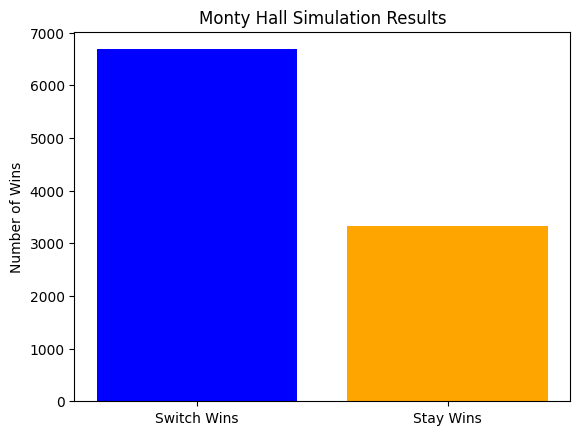

In [4]:
import random
import matplotlib.pyplot as plt

def monty_hall_simulation(num_trials=10000):
    switch_wins = 0  # Number of wins by switching
    stay_wins = 0    # Number of wins by staying

    for _ in range(num_trials):
        # 1. The host randomly places the car behind one of the doors
        doors = [0, 0, 0]  # 0 represents a goat, 1 represents the car
        car_position = random.randint(0, 2)
        doors[car_position] = 1

        # 2. The player makes an initial choice of one door
        player_choice = random.randint(0, 2)

        # 3. The host opens a door with a goat (not chosen by the player)
        possible_doors_to_open = [i for i in range(3) if i != player_choice and doors[i] == 0]
        door_opened_by_host = random.choice(possible_doors_to_open)

        # 4. The player switches to the remaining unopened door
        remaining_door = [i for i in range(3) if i != player_choice and i != door_opened_by_host][0]
        if doors[remaining_door] == 1:
            switch_wins += 1

        # 5. The player stays with their original choice
        if doors[player_choice] == 1:
            stay_wins += 1

    # Output results
    print(f"Number of wins by switching: {switch_wins} ({(switch_wins / num_trials) * 100:.2f}%)")
    print(f"Number of wins by staying: {stay_wins} ({(stay_wins / num_trials) * 100:.2f}%)")

    # Plotting the histogram
    strategies = ['Switch Wins', 'Stay Wins']
    results = [switch_wins, stay_wins]

    plt.bar(strategies, results, color=['blue', 'orange'])
    plt.title('Monty Hall Simulation Results')
    plt.ylabel('Number of Wins')
    plt.show()

# Run the simulation
monty_hall_simulation()